In [42]:
%load_ext bigquery_magics

The bigquery_magics extension is already loaded. To reload it, use:
  %reload_ext bigquery_magics


# "Will it snow tomorrow?" - The time traveler asked


In [43]:
%%bigquery
SELECT
*,
FROM `bigquery-public-data.samples.gsod`
LIMIT 20

# That was a test run

Query is running:   0%|          |

Downloading:   0%|          |

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado
0,39800,99999,1929,11,13,41.299999,4,37.000000,4,996.700012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
1,33110,99999,1929,12,16,45.500000,4,34.500000,4,1037.000000,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
2,37770,99999,1929,12,8,48.000000,4,42.000000,4,994.500000,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
3,38560,99999,1929,11,13,44.500000,4,36.200001,4,997.799988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
4,33110,99999,1929,12,15,46.700001,4,42.500000,4,1028.099976,...,NaN,<NA>,0.00,NaN,False,False,False,False,False,False
5,30910,99999,1929,10,6,50.000000,4,NaN,<NA>,983.200012,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
6,33110,99999,1929,10,1,53.299999,4,46.299999,4,1010.000000,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
7,39730,99999,1929,11,4,54.000000,4,48.700001,4,1019.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
8,38110,99999,1929,11,18,43.500000,4,39.500000,4,1016.299988,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False
9,39530,99999,1929,10,23,54.000000,4,50.000000,4,1001.099976,...,NaN,<NA>,NaN,NaN,False,False,False,False,False,False


## Part 1

### 1. Task
Change the date format to 'YYYY-MM-DD' and select the data from 2000 till 2005 for station numbers including and between 725300 and 726300 , and save it as a pandas dataframe. Note the maximum year available is 2010.

In [44]:
import pandas as pd

In [45]:
%%bigquery df
SELECT
  *,
  CAST(CONCAT(CAST(`year` AS STRING), '-', CAST(`month` AS STRING), '-', CAST(`day` AS STRING)) AS STRING) AS date
FROM
  `bigquery-public-data.samples.gsod`
WHERE
  `year` >= 2000
  AND `year` <= 2005
  AND `station_number` >= 725300
  AND `station_number` <= 726300;

Query is running:   0%|          |

Downloading:   0%|          |

In [46]:
df.head()

,station_number,wban_number,year,month,day,mean_temp,num_mean_temp_samples,mean_dew_point,num_mean_dew_point_samples,mean_sealevel_pressure,...,min_temperature_explicit,total_precipitation,snow_depth,fog,rain,snow,hail,thunder,tornado,date
0,725786,99999,2000,1,7,19.799999,4,16.200001,4,NaN,...,<NA>,0.00,3.1,False,False,False,False,False,False,2000-1-7
1,725869,99999,2000,5,11,40.599998,4,25.700001,4,NaN,...,<NA>,0.00,NaN,False,False,False,False,False,False,2000-5-11
2,725869,99999,2000,2,9,42.299999,4,35.099998,4,NaN,...,<NA>,0.00,NaN,False,False,False,False,False,False,2000-2-9
3,725827,99999,2000,2,8,38.799999,4,17.600000,4,1024.199951,...,<NA>,0.01,11.8,False,False,False,False,False,False,2000-2-8
4,725786,99999,2000,3,1,42.400002,5,36.299999,5,NaN,...,<NA>,NaN,NaN,False,False,False,False,False,False,2000-3-1


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 447037 entries, 0 to 447036
Data columns (total 32 columns):
 #   Column                              Non-Null Count   Dtype  
---  ------                              --------------   -----  
 0   station_number                      447037 non-null  Int64  
 1   wban_number                         447037 non-null  Int64  
 2   year                                447037 non-null  Int64  
 3   month                               447037 non-null  Int64  
 4   day                                 447037 non-null  Int64  
 5   mean_temp                           447037 non-null  float64
 6   num_mean_temp_samples               447037 non-null  Int64  
 7   mean_dew_point                      445667 non-null  float64
 8   num_mean_dew_point_samples          445667 non-null  Int64  
 9   mean_sealevel_pressure              272831 non-null  float64
 10  num_mean_sealevel_pressure_samples  272831 non-null  Int64  
 11  mean_station_pressure     

From here I will be using the set you provided, since I got stuck dealing with how Int64 and boolean treat missing values: I ended up with too few datapoints for the classification.

In [48]:
df = pd.read_csv("coding_challenge.csv")
df.info()
# Convert relevant columns to appropriate types
#df['snow_depth'] = pd.to_numeric(df['snow_depth'], errors='coerce')
df['date'] = pd.to_datetime(df[['year', 'month', 'day']])

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37415 entries, 0 to 37414
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   date                                37415 non-null  object 
 1   station_number                      37415 non-null  int64  
 2   wban_number                         37415 non-null  int64  
 3   year                                37415 non-null  int64  
 4   month                               37415 non-null  int64  
 5   day                                 37415 non-null  int64  
 6   mean_temp                           37415 non-null  float64
 7   num_mean_temp_samples               37415 non-null  int64  
 8   mean_dew_point                      37406 non-null  float64
 9   num_mean_dew_point_samples          37406 non-null  float64
 10  mean_sealevel_pressure              33259 non-null  float64
 11  num_mean_sealevel_pressure_samples  33259

C:\Users\LubaC\AppData\Local\Temp\ipykernel_33880\857106779.py:1: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("coding_challenge.csv")


In [49]:
df["max_temperature_explicit"] = df["max_temperature_explicit"].convert_dtypes(infer_objects=True, convert_boolean=True)
df["date"] = pd.to_datetime(df["date"])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37415 entries, 0 to 37414
Data columns (total 32 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                37415 non-null  datetime64[ns]
 1   station_number                      37415 non-null  int64         
 2   wban_number                         37415 non-null  int64         
 3   year                                37415 non-null  int64         
 4   month                               37415 non-null  int64         
 5   day                                 37415 non-null  int64         
 6   mean_temp                           37415 non-null  float64       
 7   num_mean_temp_samples               37415 non-null  int64         
 8   mean_dew_point                      37406 non-null  float64       
 9   num_mean_dew_point_samples          37406 non-null  float64       
 10  mean_sealevel_pressure

In [50]:
df.dropna(how='all', axis=1, inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37415 entries, 0 to 37414
Data columns (total 30 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                37415 non-null  datetime64[ns]
 1   station_number                      37415 non-null  int64         
 2   wban_number                         37415 non-null  int64         
 3   year                                37415 non-null  int64         
 4   month                               37415 non-null  int64         
 5   day                                 37415 non-null  int64         
 6   mean_temp                           37415 non-null  float64       
 7   num_mean_temp_samples               37415 non-null  int64         
 8   mean_dew_point                      37406 non-null  float64       
 9   num_mean_dew_point_samples          37406 non-null  float64       
 10  mean_sealevel_pressure

In [51]:
df= df.drop(['max_temperature_explicit'], axis=1)

In [52]:
print(df['station_number'].nunique())
print(len(df['station_number']))
print(df['wban_number'].nunique())
print(len(df['wban_number']))
df['station_wban'] = df['station_number'].astype(str) + '_' + df['wban_number'].astype(str)
print(df['station_wban'].nunique())
df = df.drop('station_wban', axis=1)

10
37415
11
37415
17


From my brief research, US-specific wban_number (Weather Bureau Army Navy number) is largely misleading since administrative changes or changes in ownership lead to giving a physical station different numbers throughout history. A brief check-up of actual data has confirmed this, so I am excluding this information: this particular task does not require distinguishing between different operational periods, and it will only confuse the model.

In [53]:
df = df.drop('wban_number', axis=1)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37415 entries, 0 to 37414
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                37415 non-null  datetime64[ns]
 1   station_number                      37415 non-null  int64         
 2   year                                37415 non-null  int64         
 3   month                               37415 non-null  int64         
 4   day                                 37415 non-null  int64         
 5   mean_temp                           37415 non-null  float64       
 6   num_mean_temp_samples               37415 non-null  int64         
 7   mean_dew_point                      37406 non-null  float64       
 8   num_mean_dew_point_samples          37406 non-null  float64       
 9   mean_sealevel_pressure              33259 non-null  float64       
 10  num_mean_sealevel_pres

### 2. Task
From here we are working with the saved dataframe with data from all stations 725300 to 725330 that have information from 2000 till 2005.

In [54]:
# Filter for the station numbers of 10 station of interest
start_station = 725300
end_station = 725330
df_filtered_stations = df[(df['station_number'] >= start_station) & (df['station_number'] <= end_station)]
df_final = df_filtered_stations

In [55]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37415 entries, 0 to 37414
Data columns (total 28 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                37415 non-null  datetime64[ns]
 1   station_number                      37415 non-null  int64         
 2   year                                37415 non-null  int64         
 3   month                               37415 non-null  int64         
 4   day                                 37415 non-null  int64         
 5   mean_temp                           37415 non-null  float64       
 6   num_mean_temp_samples               37415 non-null  int64         
 7   mean_dew_point                      37406 non-null  float64       
 8   num_mean_dew_point_samples          37406 non-null  float64       
 9   mean_sealevel_pressure              33259 non-null  float64       
 10  num_mean_sealevel_pres

Let us see what year received the most snowfall in the data. We shall determine that by filtering by snow_depth, as it is the closest metric to extrapolate the snowfall. I think that counting all snowy days will be al alternative, but less precise metric. Had I had more time, I would have created a separate metric likely based on precipitation.

In [56]:
# Group by year and find the maximum snow depth for each
max_snow_depth_per_year = df_final.groupby('year')['snow_depth'].max()

# Find the year with the overall maximum snow depth
year_with_highest_snow_depth = max_snow_depth_per_year.idxmax()
highest_snow_depth = max_snow_depth_per_year.max()

print(f"The year with the highest recorded snow depth was {year_with_highest_snow_depth} with a maximum depth of {highest_snow_depth:.2f}.")

# Print the maximum snow depth for all years
print("\nHere is the maximum snow depth recorded per year for comparison:")
print(max_snow_depth_per_year)

The year with the highest recorded snow depth was 2000 with a maximum depth of 18.10.

Here is the maximum snow depth recorded per year for comparison:
year
2000    18.1
2001    15.0
2002     9.1
2003     5.9
2004     7.9
2005    11.8
2006     5.1
2007     9.8
2008    13.0
2009     9.1
2010     7.9
Name: snow_depth, dtype: float64


Adding an additional field that indicates the daily change in snow depth measured at every station and identifying the station and day for which the snow depth increased the most.

In [57]:
# Sort by station and date to ensure correct calculation of daily change
df_final = df_final.sort_values(['station_number', 'date'])

# Add a new field for the daily change in snow depth
df_final['daily_snow_depth_change'] = df_final.groupby('station_number')['snow_depth'].diff().fillna(0)

# Identify the station and day with the maximum increase in snow depth
max_increase = df_final['daily_snow_depth_change'].max()
station_day_max_increase = df_final[df_final['daily_snow_depth_change'] == max_increase][['station_number', 'date']]

if not station_day_max_increase.empty:
    station_max = station_day_max_increase['station_number'].iloc[0]
    date_max = station_day_max_increase['date'].iloc[0].strftime('%Y-%m-%d')
    print(f"The maximum daily increase in snow depth was {max_increase} at station {station_max} on {date_max}.")
else:
    print("No increase in snow depth found in the dataset.")

The maximum daily increase in snow depth was 9.800000190734863 at station 725300 on 2005-01-22.


In [58]:
df = df_final
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37415 entries, 9787 to 25033
Data columns (total 29 columns):
 #   Column                              Non-Null Count  Dtype         
---  ------                              --------------  -----         
 0   date                                37415 non-null  datetime64[ns]
 1   station_number                      37415 non-null  int64         
 2   year                                37415 non-null  int64         
 3   month                               37415 non-null  int64         
 4   day                                 37415 non-null  int64         
 5   mean_temp                           37415 non-null  float64       
 6   num_mean_temp_samples               37415 non-null  int64         
 7   mean_dew_point                      37406 non-null  float64       
 8   num_mean_dew_point_samples          37406 non-null  float64       
 9   mean_sealevel_pressure              33259 non-null  float64       
 10  num_mean_sealevel_pressu

Finally, we are to clean the dataset. We will start by dealing with the missing values. There are some missing values that should be set to zero, since their absence is meaningful, others we will impute with their k-nearest neighbours. Some we will drop, and for that I am looking at the correlation between seemingly less relevant columns and target variable.

In [59]:
correlation_temp_samples_snow = df['num_mean_temp_samples'].corr(df['snow'])
correlation_dew_samples_snow = df['num_mean_dew_point_samples'].corr(df['snow'])
correlation_sealevel_samples_snow = df['num_mean_sealevel_pressure_samples'].corr(df['snow'])
correlation_pressure_samples_snow = df['num_mean_station_pressure_samples'].corr(df['snow'])
correlation_visibility_samples_snow = df['num_mean_visibility_samples'].corr(df['snow'])
correlation_wind_samples_snow = df['num_mean_wind_speed_samples'].corr(df['snow'])
print(f"Correlation (Number of observations of temperature vs Snow): {correlation_temp_samples_snow}")
print(f"Correlation (Number of observations of dew points vs Snow): {correlation_dew_samples_snow}")
print(f"Correlation (Number of observations of sea level pressure vs Snow): {correlation_sealevel_samples_snow}")
print(f"Correlation (Number of observation of station pressure vs Snow): {correlation_pressure_samples_snow}")
print(f"Correlation (Number of observations of visibility measures vs Snow): {correlation_visibility_samples_snow}")
print(f"Correlation (Number of observations of wind speed vs Snow): {correlation_wind_samples_snow}")

Correlation (Number of observations of temperature vs Snow): 0.07143977853317758
Correlation (Number of observations of dew points vs Snow): 0.07011868029728245
Correlation (Number of observations of sea level pressure vs Snow): -0.19295216764353115
Correlation (Number of observation of station pressure vs Snow): -0.08599804908551915
Correlation (Number of observations of visibility measures vs Snow): 0.0711189042156252
Correlation (Number of observations of wind speed vs Snow): 0.061650558808676884


In [60]:
# Fill in fo snow depth
df['snow_depth'] = df['snow_depth'].fillna(0.0)
# Fill in for columns with number of samples
num_samples_cols = [col for col in df if col.startswith('num_mean_')]
df = df.drop(columns = num_samples_cols, axis=1)
#for col in num_samples_cols:
#    df[col] = df[col].fillna(0)

df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37415 entries, 9787 to 25033
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   date                      37415 non-null  datetime64[ns]
 1   station_number            37415 non-null  int64         
 2   year                      37415 non-null  int64         
 3   month                     37415 non-null  int64         
 4   day                       37415 non-null  int64         
 5   mean_temp                 37415 non-null  float64       
 6   mean_dew_point            37406 non-null  float64       
 7   mean_sealevel_pressure    33259 non-null  float64       
 8   mean_station_pressure     1885 non-null   float64       
 9   mean_visibility           37396 non-null  float64       
 10  mean_wind_speed           37403 non-null  float64       
 11  max_sustained_wind_speed  37398 non-null  float64       
 12  max_gust_wind_speed 

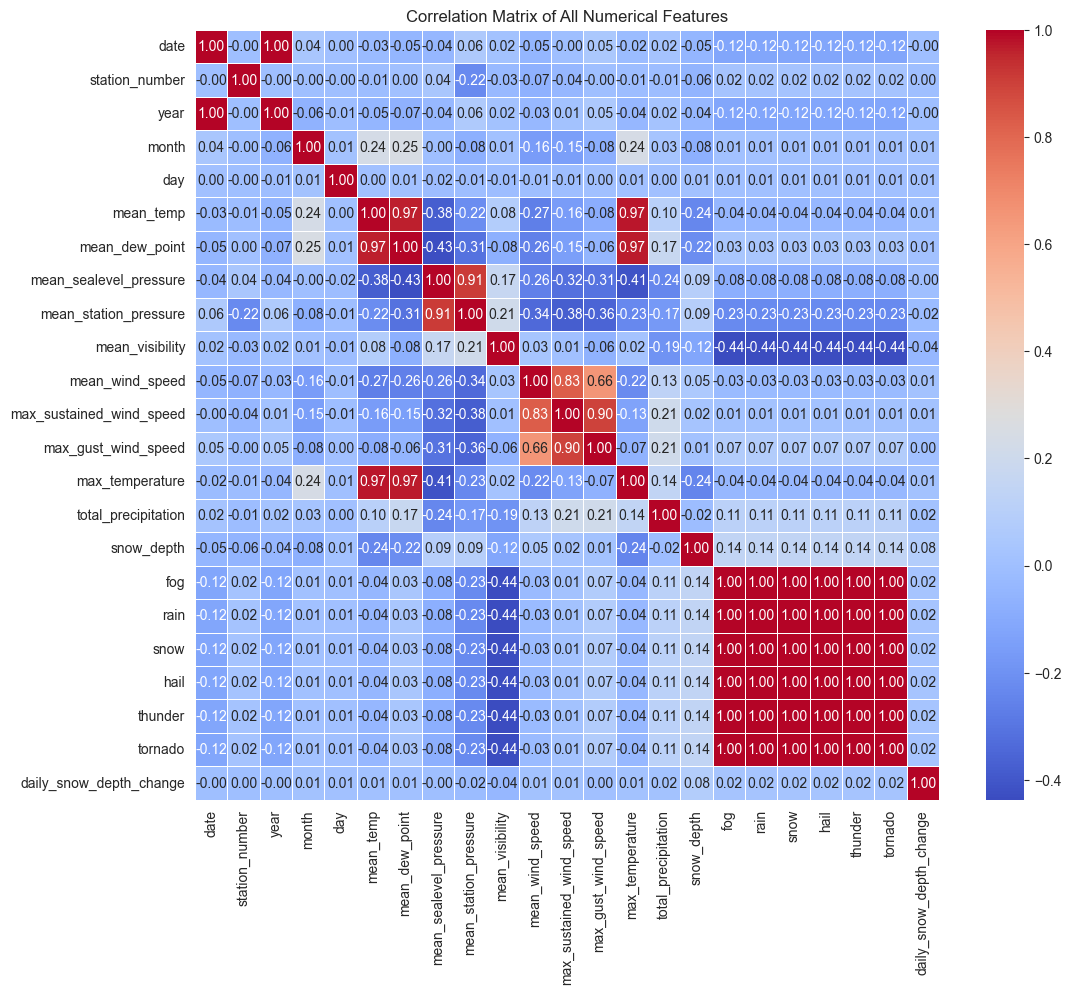

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

correlation_matrix = df.corr()

plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix of All Numerical Features')
plt.show()

All remaining binary values are highly correlated, others are expected.

Here starts the process of data normalization.

In [62]:
# Start by splitting the data into numeric and not numeric
df['station_number'] = df['station_number'].astype(str)
numerical_df = df.select_dtypes(include=['number', 'bool', 'boolean']).copy()
non_numerical_df = df.select_dtypes(exclude=['number', 'bool', 'boolean']).copy()

In [63]:
numerical_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37415 entries, 9787 to 25033
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   year                      37415 non-null  int64  
 1   month                     37415 non-null  int64  
 2   day                       37415 non-null  int64  
 3   mean_temp                 37415 non-null  float64
 4   mean_dew_point            37406 non-null  float64
 5   mean_sealevel_pressure    33259 non-null  float64
 6   mean_station_pressure     1885 non-null   float64
 7   mean_visibility           37396 non-null  float64
 8   mean_wind_speed           37403 non-null  float64
 9   max_sustained_wind_speed  37398 non-null  float64
 10  max_gust_wind_speed       22393 non-null  float64
 11  max_temperature           37412 non-null  float64
 12  total_precipitation       36967 non-null  float64
 13  snow_depth                37415 non-null  float64
 14  fog     

In [64]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_numerical_df = pd.DataFrame(scaler.fit_transform(numerical_df), columns=numerical_df.columns)


In [65]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)

imputed_array = imputer.fit_transform(scaled_numerical_df)

# Convert the imputed array back to a Pandas DataFrame
imputed_numerical_df = pd.DataFrame(imputed_array, columns=scaled_numerical_df.columns)

In [66]:
# Combine with non-numerical
df_imputed = pd.concat([imputed_numerical_df, non_numerical_df], axis=1)

In [67]:
df_imputed.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37415 entries, 0 to 37414
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   year                      37415 non-null  float64       
 1   month                     37415 non-null  float64       
 2   day                       37415 non-null  float64       
 3   mean_temp                 37415 non-null  float64       
 4   mean_dew_point            37415 non-null  float64       
 5   mean_sealevel_pressure    37415 non-null  float64       
 6   mean_station_pressure     37415 non-null  float64       
 7   mean_visibility           37415 non-null  float64       
 8   mean_wind_speed           37415 non-null  float64       
 9   max_sustained_wind_speed  37415 non-null  float64       
 10  max_gust_wind_speed       37415 non-null  float64       
 11  max_temperature           37415 non-null  float64       
 12  total_precipitatio

In [68]:
#Verify that the data is clean
print(df_imputed.isnull().sum())

year                        0
month                       0
day                         0
mean_temp                   0
mean_dew_point              0
mean_sealevel_pressure      0
mean_station_pressure       0
mean_visibility             0
mean_wind_speed             0
max_sustained_wind_speed    0
max_gust_wind_speed         0
max_temperature             0
total_precipitation         0
snow_depth                  0
fog                         0
rain                        0
snow                        0
hail                        0
thunder                     0
tornado                     0
daily_snow_depth_change     0
date                        0
station_number              0
dtype: int64


In [69]:
df = df_imputed
df['station_number'] = df['station_number'].astype(float)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 37415 entries, 0 to 37414
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype         
---  ------                    --------------  -----         
 0   year                      37415 non-null  float64       
 1   month                     37415 non-null  float64       
 2   day                       37415 non-null  float64       
 3   mean_temp                 37415 non-null  float64       
 4   mean_dew_point            37415 non-null  float64       
 5   mean_sealevel_pressure    37415 non-null  float64       
 6   mean_station_pressure     37415 non-null  float64       
 7   mean_visibility           37415 non-null  float64       
 8   mean_wind_speed           37415 non-null  float64       
 9   max_sustained_wind_speed  37415 non-null  float64       
 10  max_gust_wind_speed       37415 non-null  float64       
 11  max_temperature           37415 non-null  float64       
 12  total_precipitatio

## Part 2

We want to train a classification model for a specific date. For this, we would need to define a prediction window. For the date and each station we would need to extract the weather data, train a classifiction model, and make a prediction.

Moreover, the dataset is most likely biased towards no snow condition, that should be remedied by introducing the weights.

In [70]:
import datetime as dt
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report


In [71]:
# The most crucial step for defining a prediction window, creating lagged days
lag_days = 3
numerical_features = ["mean_temp","mean_dew_point", "mean_sealevel_pressure", "mean_station_pressure", "mean_visibility", "mean_wind_speed", "max_sustained_wind_speed","max_gust_wind_speed","max_temperature", "total_precipitation", "snow_depth", "fog", "rain", "hail", "thunder", "tornado", "daily_snow_depth_change"]
lagged_features_list = []

for feature in numerical_features:
    for i in range(1, lag_days + 1):
        lagged_col = df.groupby('station_number')[feature].shift(i).rename(f'{feature}_lag{i}')
        lagged_features_list.append(lagged_col)

# Concatenate all the lagged feature into the original df
df = pd.concat([df, *lagged_features_list], axis=1)
df_prepared = df
# Dropping NaN values
df_prepared = df.dropna(subset=[f'{f}_lag{i}' for f in numerical_features for i in range(1, lag_days + 1)] + ['snow'])


In [72]:
df_prepared.info()

<class 'pandas.core.frame.DataFrame'>
Index: 37385 entries, 9 to 37414
Data columns (total 74 columns):
 #   Column                         Non-Null Count  Dtype         
---  ------                         --------------  -----         
 0   year                           37385 non-null  float64       
 1   month                          37385 non-null  float64       
 2   day                            37385 non-null  float64       
 3   mean_temp                      37385 non-null  float64       
 4   mean_dew_point                 37385 non-null  float64       
 5   mean_sealevel_pressure         37385 non-null  float64       
 6   mean_station_pressure          37385 non-null  float64       
 7   mean_visibility                37385 non-null  float64       
 8   mean_wind_speed                37385 non-null  float64       
 9   max_sustained_wind_speed       37385 non-null  float64       
 10  max_gust_wind_speed            37385 non-null  float64       
 11  max_temperature     

In [73]:
# Define the target date as in the assignment. I leave it like that since I am not sure whether you wanted a more precise target date.
target_date = dt.datetime.today() - dt.timedelta(days=20 * 365)
target_year = target_date.year
target_month = target_date.month
target_day = target_date.day

print(f"Target date for test set: {target_date.strftime('%Y-%m-%d')}")

# Split into tets set (just ine date) and the rest
df_test = df_prepared[df_prepared['date'].dt.date == target_date.date()].copy()
df_train_eval = df_prepared[df_prepared['date'].dt.date != target_date.date()].copy()

# Make sure the sets are of the same shape
print(f"Shape of df_test: {df_test.shape}")
print(f"Shape of df_train_eval: {df_train_eval.shape}")

# Create date column for the chronological split

df_train_eval = df_train_eval.sort_values('date')

# Split into training and evaluation sets
train_size = int(0.8 * len(df_train_eval))
df_train = df_train_eval.iloc[:train_size].drop(columns=['date'], errors='ignore').copy()
df_eval = df_train_eval.iloc[train_size:].drop(columns=['date'], errors='ignore').copy()

# Define features and target

X_train = df_train.drop(columns=['snow', 'date', 'year', 'month', 'day'], errors='ignore')
y_train = df_train['snow'].astype(int)
X_eval = df_eval.drop(columns=['snow', 'date', 'year', 'month', 'day'], errors='ignore')
y_eval = df_eval['snow'].astype(int)
X_test = df_test.drop(columns=['snow', 'date', 'year', 'month', 'day'], errors='ignore')
y_test = df_test['snow'].astype(int)

Target date for test set: 2005-05-25
Shape of df_test: (10, 74)
Shape of df_train_eval: (37375, 74)


In [74]:
# Training and evaluation
model = LogisticRegression(random_state=42, class_weight='balanced', solver='liblinear') # Balancing the dataset
model.fit(X_train, y_train)

y_pred_eval = model.predict(X_eval)
print("Evaluation Set Performance:")
print(f"Accuracy: {accuracy_score(y_eval, y_pred_eval):.4f}")
print(classification_report(y_eval, y_pred_eval, zero_division=0))

# Make predictions
prediction = model.predict(X_test)

# Convert the array to series
prediction_series = pd.Series(prediction, index=y_test.index, name='predicted')

# Concatenate the series for a final result table
df_concatenated = pd.concat([y_test, prediction_series, X_test["station_number"].astype(int)], axis=1).iloc[:10].copy()
print(df_concatenated)

Evaluation Set Performance:
Accuracy: 1.0000
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      6446
           2       1.00      1.00      1.00      1029

    accuracy                           1.00      7475
   macro avg       1.00      1.00      1.00      7475
weighted avg       1.00      1.00      1.00      7475

       snow  predicted  station_number
519       0          0          725314
863       2          2          725317
2492      0          0          725320
7703      0          0          725305
13588     0          0          725300
22031     2          2          725330
22644     2          2          725326
26829     0          0          725316
29083     0          0          725327
30072     0          0          725315


The results ended up being accurate, but too overfit. A logistic regression was a good starting point, but for a model that would be able to generalize well it is likely not the best choice. I have also considered tree-based algorithms for they handle categorical data as features better, but since I have not implemented the features I wanted I have left the intended comparison at that. Also, now it seems that the highly correlated features would not allow for a better fit.

I have not scaled back the features and the prediction for the interpretation. I have not included some of the planned features like encoding of categorical features, rolling statistics for the time window or potential merging with geospatial data for a lack of time.

For an improved approach additional features and full dataset should be utilized and different algorithms like neural networks should be taken into consideration for they handle temporal dependencies better.